# Image Enhancement - Image sharpening

Importing necessary libraries for image sharpening
- cv2
- matplotlib
- numpy

In [ ]:
#Import the necessary libraries
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os



Mounting google drive where the dataset is stored

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
# List the contents of the root directory
!ls '/content/drive/MyDrive/'

# Change directory
%cd '/content/drive/MyDrive/ML'

'Colab Notebooks'   databases   ML   MyModels   mysql  'Neural Networks'  'Subject Materials'
/content/drive/MyDrive/ML


Creation of image sharpening kernel

simple image sharpening kernel  is created here by highlighting the edges of the images.

In [ ]:
# Create the sharpening kernel
kernel = np.array([[0, -1, 0],
                   [-1, 5, -1],
                   [0, -1, 0]])

In [ ]:
%pwd

'/content/drive/MyDrive/ML'

Generation of file path and filtering out potentially any other file type

In [ ]:
# Path to your folder containing the images
folder_path = 'Train'

# List all files in the folder and filter out non-jpg files
image_files = [f for f in os.listdir(folder_path) if f.endswith('.jpg')]

# Generate full image paths
image_paths = [os.path.join(folder_path, file) for file in image_files]


Creation of new folder to store sharpened images

In [ ]:
# New folder name for sharpened images
new_folder_name = 'SharpenedImages'
new_folder_path = os.path.join('/content/drive/MyDrive/ML', new_folder_name)

# Create the new folder if it doesn't exist
if not os.path.exists(new_folder_path):
    os.makedirs(new_folder_path)

Iterate over each image to apply the image sharpening

Since images in Train folder are already in ascending order, iteration and creation of the file path for the sharpened images are as follows.

In [ ]:
# Loop through each image
for idx, img_path in enumerate(image_paths):
    # Load image
    image = cv2.imread(img_path)

    # Check if the image is loaded correctly
    if image is None:
        print(f"Error: Image at {img_path} not loaded. Check the file path.")
        continue

    # Sharpen the image
    sharpened_image = cv2.filter2D(image, -1, kernel)

    sharpened_image_path = os.path.join(new_folder_path, f'sharpened_image_{idx}.jpg')

    # Save the sharpened image
    cv2.imwrite(sharpened_image_path, sharpened_image)

In [ ]:
%cd SharpenedImages

/content/drive/MyDrive/ML/SharpenedImages


Displaying a few of the sharpened images for demonstrative purposes

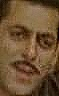

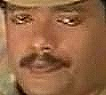

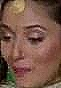

In [ ]:
from IPython.display import Image, display

listOfImageNames = ['sharpened_image_1.jpg',
                    'sharpened_image_3.jpg',
                    'sharpened_image_5.jpg']

for imageName in listOfImageNames:
    display(Image(filename=imageName))